🏀 Enhanced CBB Betting Market Portfolio Analysis

📊 Simulating 100,000 games
👥 10 bettors with unique bet type skills
💰 All measured in UNITS (normalized across bankrolls)

✅ Generated 100,000 games between 99 teams

✅ Simulated 100,000 total bets

Bets per bettor:
bettor
Volume_Vince        30000
Sharp_Sam           25000
Homer_Henry         20000
Casual_Chris        15000
Contrarian_Carla    10000
Name: count, dtype: int64

Bets per type:
bet_type
ML        40011
SPREAD    33465
OVER      14769
UNDER     11755
Name: count, dtype: int64

INDIVIDUAL BETTOR PERFORMANCE (IN UNITS)
                  Total_Units_Risked  Avg_Unit_Size  Net_Profit_Units   Wins  \
bettor                                                                         
Sharp_Sam                  24969.520          0.999          1926.013  14085   
Contrarian_Carla           10195.634          1.020           632.853   5555   
Volume_Vince               29983.621          0.999            32.116  15744   
Homer_Henry   

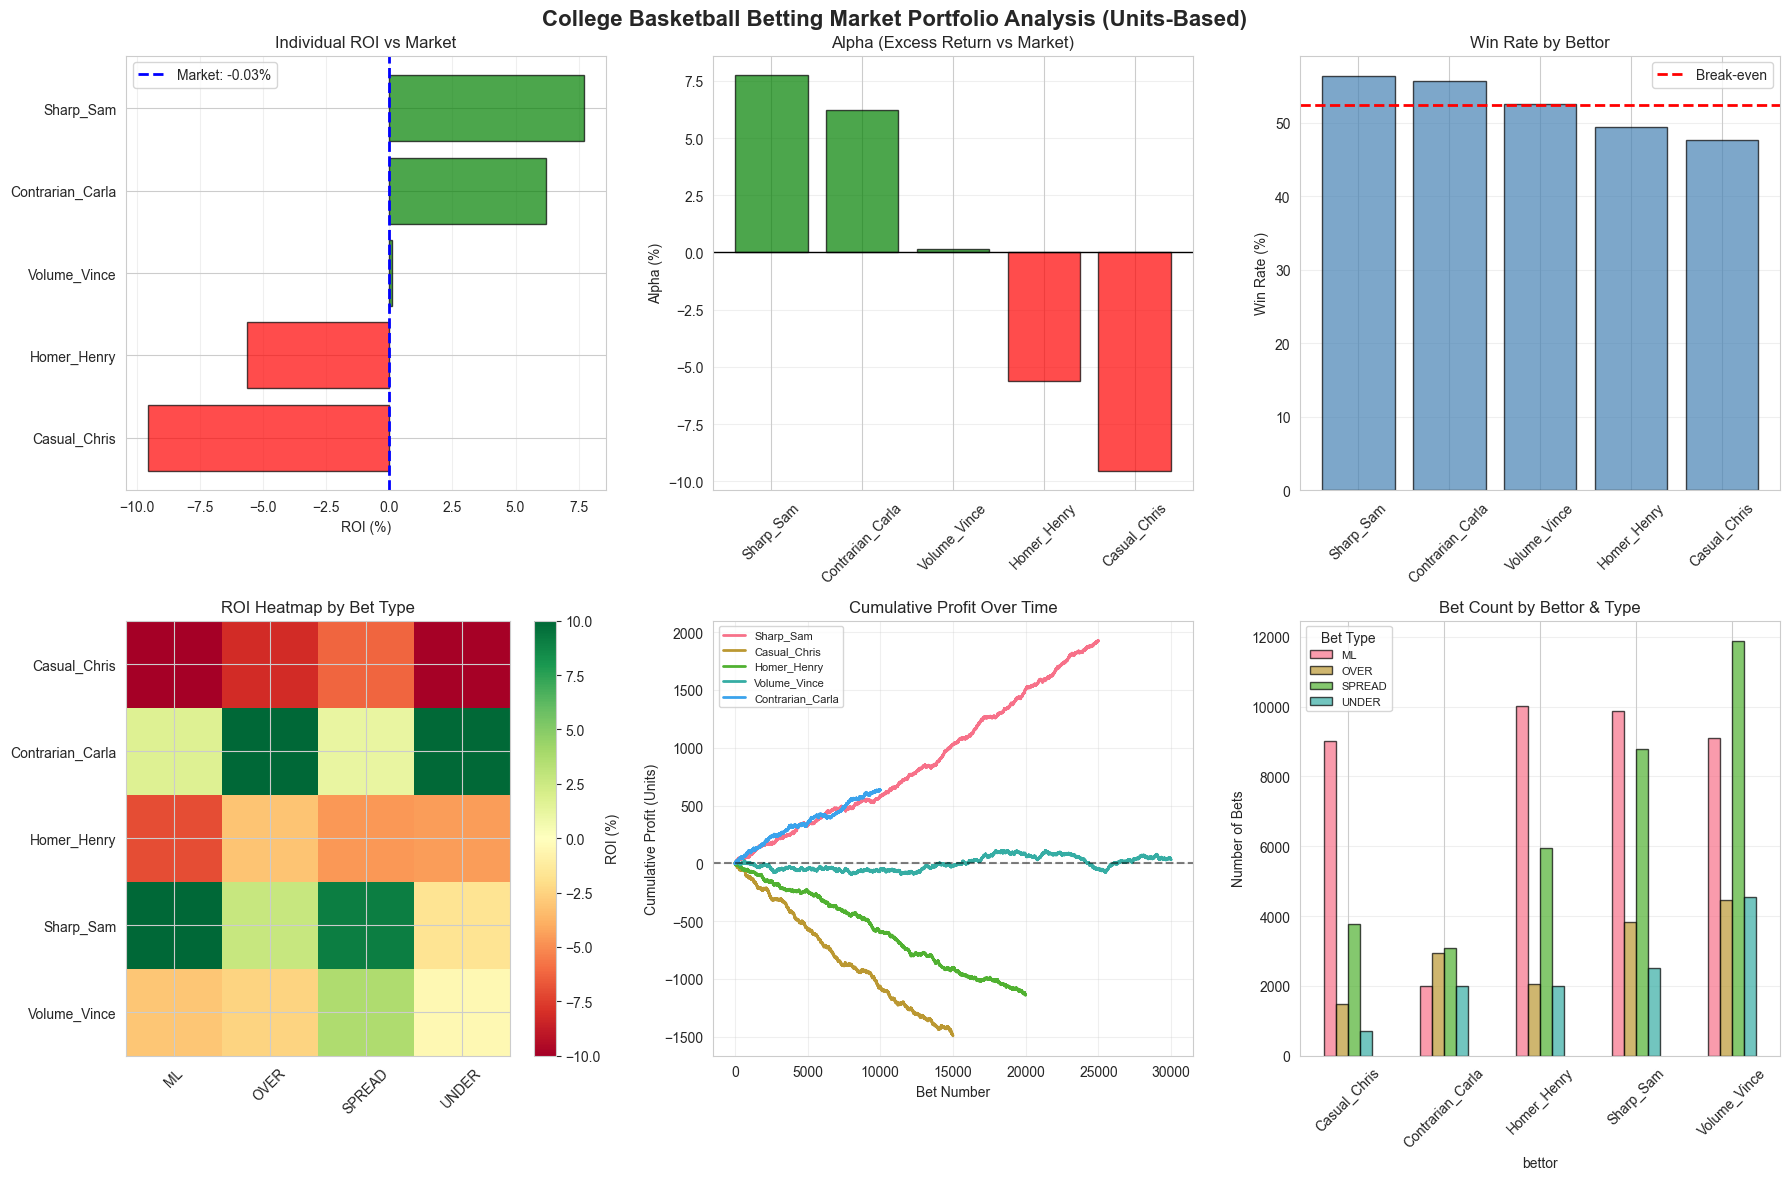


🎯 KEY INSIGHTS & TAKEAWAYS

🏆 Best Overall: Sharp_Sam (+7.71% ROI)

📊 Highest Alpha: Sharp_Sam (+7.74% above market)

📈 Market Portfolio: -0.03% ROI

🔥 BET TYPE STRENGTHS:
   Sharp_Sam            → ML (+10.9% ROI)
   Casual_Chris         → SPREAD (-6.2% ROI)
   Homer_Henry          → OVER (-3.1% ROI)
   Volume_Vince         → SPREAD (+3.7% ROI)
   Contrarian_Carla     → OVER (+12.2% ROI)

✨ Analysis Complete! Use units to track your real betting! 🏀


In [2]:
# ============================================================
# ENHANCED CBB BETTING MARKET PORTFOLIO ANALYSIS
# n=10,000 | ML/Spread/O-U | Units-Based | Trend Analysis
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)

# Set random seed
np.random.seed(42)

print("🏀 Enhanced CBB Betting Market Portfolio Analysis")
print("="*60)

# ============================================================
# CONFIGURATION
# ============================================================

N_TOTAL_GAMES = 100000
N_BETTORS = 10

# Define bettor profiles
# Each has different skills per bet type and unit sizes
bettors = {
    'Sharp_Sam': {
        'avg_unit_size': 1.0,  # 1 unit per bet
        'unit_variance': 0.2,
        'bet_frequency': 0.25,
        'style': 'selective',
        # Win rates by bet type
        'win_rates': {
            'ML': 0.58,      # Crushes moneylines!
            'SPREAD': 0.57,  # Great at spreads
            'OVER': 0.53,    # OK at overs
            'UNDER': 0.52    # OK at unders
        },
        # Bet type preferences
        'bet_type_prefs': {
            'ML': 0.40,
            'SPREAD': 0.35,
            'OVER': 0.15,
            'UNDER': 0.10
        }
    },
    'Casual_Chris': {
        'avg_unit_size': 1.0,
        'unit_variance': 0.5,  # Varies bet size a lot
        'bet_frequency': 0.15,
        'style': 'casual',
        'win_rates': {
            'ML': 0.46,      # Loses on ML
            'SPREAD': 0.50,  # Break-even spreads
            'OVER': 0.49,    # Slight loser
            'UNDER': 0.47    # Loses on unders
        },
        'bet_type_prefs': {
            'ML': 0.60,      # Loves ML (but bad at it!)
            'SPREAD': 0.25,
            'OVER': 0.10,
            'UNDER': 0.05
        }
    },
    'Homer_Henry': {
        'avg_unit_size': 1.0,
        'unit_variance': 0.3,
        'bet_frequency': 0.20,
        'style': 'homer',
        'win_rates': {
            'ML': 0.49,
            'SPREAD': 0.51,  # Slightly better at spreads
            'OVER': 0.50,
            'UNDER': 0.50
        },
        'bet_type_prefs': {
            'ML': 0.50,
            'SPREAD': 0.30,
            'OVER': 0.10,
            'UNDER': 0.10
        }
    },
    'Volume_Vince': {
        'avg_unit_size': 1.0,
        'unit_variance': 0.15,  # Consistent sizing
        'bet_frequency': 0.30,  # Bets a lot!
        'style': 'volume',
        'win_rates': {
            'ML': 0.51,
            'SPREAD': 0.54,  # Best at spreads
            'OVER': 0.51,
            'UNDER': 0.52
        },
        'bet_type_prefs': {
            'ML': 0.30,
            'SPREAD': 0.40,  # Focuses on spreads
            'OVER': 0.15,
            'UNDER': 0.15
        }
    },
    'Contrarian_Carla': {
        'avg_unit_size': 1.0,
        'unit_variance': 0.4,
        'bet_frequency': 0.10,  # Very selective
        'style': 'contrarian',
        'win_rates': {
            'ML': 0.52,
            'SPREAD': 0.53,
            'OVER': 0.57,    # CRUSHES overs!
            'UNDER': 0.56    # Great at unders too
        },
        'bet_type_prefs': {
            'ML': 0.20,
            'SPREAD': 0.30,
            'OVER': 0.30,    # Totals specialist
            'UNDER': 0.20
        }
    }
}

print(f"\n📊 Simulating {N_TOTAL_GAMES:,} games")
print(f"👥 {N_BETTORS} bettors with unique bet type skills")
print(f"💰 All measured in UNITS (normalized across bankrolls)")

# ============================================================
# GENERATE GAMES
# ============================================================

teams = [f'Team_{i}' for i in range(1, 100)]
games = pd.DataFrame({
    'game_id': range(N_TOTAL_GAMES),
    'home_team': np.random.choice(teams, N_TOTAL_GAMES),
    'away_team': np.random.choice(teams, N_TOTAL_GAMES),
})

print(f"\n✅ Generated {len(games):,} games between {len(teams)} teams")

# ============================================================
# SIMULATE BETS
# ============================================================

all_bets = []
bet_id = 0

for bettor_name, profile in bettors.items():
    # Determine which games to bet on
    n_bets = int(N_TOTAL_GAMES * profile['bet_frequency'])
    game_indices = np.random.choice(N_TOTAL_GAMES, n_bets, replace=False)
    
    for game_id in game_indices:
        # Choose bet type based on preferences
        bet_type = np.random.choice(
            list(profile['bet_type_prefs'].keys()),
            p=list(profile['bet_type_prefs'].values())
        )
        
        # Get win rate for this bet type
        win_rate = profile['win_rates'][bet_type]
        
        # Add some variance
        actual_win_rate = win_rate + np.random.normal(0, 0.03)
        actual_win_rate = np.clip(actual_win_rate, 0.35, 0.70)
        
        # Determine outcome
        won = np.random.random() < actual_win_rate
        
        # Generate unit size
        units = abs(np.random.normal(
            profile['avg_unit_size'], 
            profile['unit_variance']
        ))
        units = max(0.5, min(2.0, units))  # Keep between 0.5 and 2.0 units
        
        # Standard -110 odds
        odds = -110
        
        # Calculate profit in units
        if won:
            profit_units = units * (100 / 110)  # Win at -110
        else:
            profit_units = -units
        
        # ROI per bet
        roi = (profit_units / units) * 100
        
        all_bets.append({
            'bet_id': bet_id,
            'bettor': bettor_name,
            'game_id': game_id,
            'bet_type': bet_type,
            'units': units,
            'odds': odds,
            'won': won,
            'profit_units': profit_units,
            'roi': roi
        })
        bet_id += 1

# Create DataFrame
bets_df = pd.DataFrame(all_bets)

print(f"\n✅ Simulated {len(bets_df):,} total bets")
print(f"\nBets per bettor:")
print(bets_df['bettor'].value_counts())
print(f"\nBets per type:")
print(bets_df['bet_type'].value_counts())

# ============================================================
# INDIVIDUAL PERFORMANCE
# ============================================================

print("\n" + "="*60)
print("INDIVIDUAL BETTOR PERFORMANCE (IN UNITS)")
print("="*60)

bettor_stats = bets_df.groupby('bettor').agg({
    'units': ['sum', 'mean'],
    'profit_units': 'sum',
    'won': ['sum', 'count', 'mean'],
}).round(3)

bettor_stats.columns = ['Total_Units_Risked', 'Avg_Unit_Size', 'Net_Profit_Units', 
                        'Wins', 'Total_Bets', 'Win_Rate']

bettor_stats['ROI_%'] = (bettor_stats['Net_Profit_Units'] / 
                          bettor_stats['Total_Units_Risked'] * 100).round(2)

bettor_stats = bettor_stats.sort_values('ROI_%', ascending=False)

print(bettor_stats)
print(f"\n💡 Break-even at -110 odds requires 52.4% win rate")

# ============================================================
# GROUP MARKET PORTFOLIO
# ============================================================

print("\n" + "="*60)
print("GROUP MARKET PORTFOLIO (Weighted by Units)")
print("="*60)

total_units_risked = bets_df['units'].sum()
total_profit_units = bets_df['profit_units'].sum()
group_roi = (total_profit_units / total_units_risked) * 100
group_win_rate = bets_df['won'].mean() * 100

print(f"\nTotal Units Risked: {total_units_risked:,.1f} units")
print(f"Total Profit: {total_profit_units:+,.1f} units")
print(f"\n📊 Market Portfolio ROI: {group_roi:+.2f}%")
print(f"📊 Market Win Rate: {group_win_rate:.2f}%")
print(f"\n💡 This is the 'wisdom of crowds' baseline")

# ============================================================
# ALPHA ANALYSIS
# ============================================================

print("\n" + "="*60)
print("ALPHA: WHO BEATS THE MARKET?")
print("="*60)

alpha_df = pd.DataFrame({
    'Bettor': bettor_stats.index,
    'Individual_ROI': bettor_stats['ROI_%'].values,
    'Market_ROI': group_roi,
    'Alpha': bettor_stats['ROI_%'].values - group_roi,
    'Total_Bets': bettor_stats['Total_Bets'].values
}).sort_values('Alpha', ascending=False)

print(alpha_df.to_string(index=False))

print(f"\n🏆 Positive Alpha = Beating the market consensus")
print(f"🏆 Negative Alpha = Underperforming the group")

# ============================================================
# PERFORMANCE BY BET TYPE - THE TREND ANALYSIS!
# ============================================================

print("\n" + "="*60)
print("🔥 PERFORMANCE BY BET TYPE - FIND YOUR EDGE!")
print("="*60)

bet_type_performance = bets_df.groupby(['bettor', 'bet_type']).agg({
    'units': 'sum',
    'profit_units': 'sum',
    'won': ['count', 'sum', 'mean']
}).round(3)

bet_type_performance.columns = ['Units_Risked', 'Profit_Units', 'Total_Bets', 'Wins', 'Win_Rate']
bet_type_performance['ROI_%'] = (
    bet_type_performance['Profit_Units'] / bet_type_performance['Units_Risked'] * 100
).round(2)

bet_type_performance = bet_type_performance.reset_index()

# Show each bettor's performance by bet type
for bettor in bettors.keys():
    print(f"\n{'='*40}")
    print(f"  {bettor}")
    print(f"{'='*40}")
    
    bettor_data = bet_type_performance[bet_type_performance['bettor'] == bettor]
    bettor_data = bettor_data.sort_values('ROI_%', ascending=False)
    
    for _, row in bettor_data.iterrows():
        emoji = "🔥" if row['ROI_%'] > 5 else "✅" if row['ROI_%'] > 0 else "❌"
        print(f"{emoji} {row['bet_type']:8s}: {row['Win_Rate']*100:5.1f}% WR | "
              f"{row['ROI_%']:+6.2f}% ROI | {int(row['Total_Bets']):3d} bets | "
              f"{row['Profit_Units']:+6.2f} units")

print(f"\n💡 Look for patterns: Some bettors CRUSH certain bet types!")

# ============================================================
# BEST/WORST BET TYPE PER BETTOR
# ============================================================

print("\n" + "="*60)
print("🎯 STRENGTHS & WEAKNESSES SUMMARY")
print("="*60)

strengths_weaknesses = []

for bettor in bettors.keys():
    bettor_data = bet_type_performance[bet_type_performance['bettor'] == bettor].copy()
    
    if len(bettor_data) > 0:
        # Find best and worst
        best = bettor_data.loc[bettor_data['ROI_%'].idxmax()]
        worst = bettor_data.loc[bettor_data['ROI_%'].idxmin()]
        
        strengths_weaknesses.append({
            'Bettor': bettor,
            'Best_Type': best['bet_type'],
            'Best_ROI': f"{best['ROI_%']:+.1f}%",
            'Best_WR': f"{best['Win_Rate']*100:.1f}%",
            'Worst_Type': worst['bet_type'],
            'Worst_ROI': f"{worst['ROI_%']:+.1f}%",
            'Worst_WR': f"{worst['Win_Rate']*100:.1f}%"
        })

sw_df = pd.DataFrame(strengths_weaknesses)
print(sw_df.to_string(index=False))

print("\n💡 ACTIONABLE INSIGHT: Focus on your strengths, avoid your weaknesses!")

# ============================================================
# VISUALIZATIONS
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('College Basketball Betting Market Portfolio Analysis (Units-Based)', 
             fontsize=16, fontweight='bold')

# 1. Individual ROI vs Market
ax = axes[0, 0]
roi_data = alpha_df.sort_values('Individual_ROI', ascending=True)
colors = ['green' if x > 0 else 'red' for x in roi_data['Individual_ROI']]
ax.barh(roi_data['Bettor'], roi_data['Individual_ROI'], color=colors, alpha=0.7, edgecolor='black')
ax.axvline(group_roi, color='blue', linestyle='--', linewidth=2, label=f'Market: {group_roi:.2f}%')
ax.set_xlabel('ROI (%)')
ax.set_title('Individual ROI vs Market')
ax.legend()
ax.grid(axis='x', alpha=0.3)

# 2. Alpha Distribution
ax = axes[0, 1]
colors = ['green' if x > 0 else 'red' for x in alpha_df['Alpha']]
ax.bar(alpha_df['Bettor'], alpha_df['Alpha'], color=colors, alpha=0.7, edgecolor='black')
ax.axhline(0, color='black', linestyle='-', linewidth=1)
ax.set_ylabel('Alpha (%)')
ax.set_title('Alpha (Excess Return vs Market)')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

# 3. Win Rate
ax = axes[0, 2]
win_rates = bettor_stats['Win_Rate'] * 100
ax.bar(win_rates.index, win_rates.values, alpha=0.7, color='steelblue', edgecolor='black')
ax.axhline(52.4, color='red', linestyle='--', linewidth=2, label='Break-even')
ax.set_ylabel('Win Rate (%)')
ax.set_title('Win Rate by Bettor')
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# 4. Heatmap
ax = axes[1, 0]
heatmap_data = bet_type_performance.pivot_table(
    index='bettor', columns='bet_type', values='ROI_%', fill_value=0
)
im = ax.imshow(heatmap_data.values, cmap='RdYlGn', aspect='auto', vmin=-10, vmax=10)
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_yticks(range(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns, rotation=45)
ax.set_yticklabels(heatmap_data.index)
ax.set_title('ROI Heatmap by Bet Type')
plt.colorbar(im, ax=ax, label='ROI (%)')

# 5. Cumulative Profit
ax = axes[1, 1]
for bettor in bettors.keys():
    bettor_bets = bets_df[bets_df['bettor'] == bettor].sort_values('bet_id')
    cumulative = bettor_bets['profit_units'].cumsum()
    ax.plot(range(len(cumulative)), cumulative, label=bettor, linewidth=2)
ax.axhline(0, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('Bet Number')
ax.set_ylabel('Cumulative Profit (Units)')
ax.set_title('Cumulative Profit Over Time')
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

# 6. Bet Count by Type
ax = axes[1, 2]
bet_counts = bets_df.groupby(['bettor', 'bet_type']).size().unstack(fill_value=0)
bet_counts.plot(kind='bar', ax=ax, alpha=0.7, edgecolor='black')
ax.set_ylabel('Number of Bets')
ax.set_title('Bet Count by Bettor & Type')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Bet Type', fontsize=8)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# KEY INSIGHTS
# ============================================================

print("\n" + "="*60)
print("🎯 KEY INSIGHTS & TAKEAWAYS")
print("="*60)

best_bettor = bettor_stats['ROI_%'].idxmax()
best_roi = bettor_stats.loc[best_bettor, 'ROI_%']
print(f"\n🏆 Best Overall: {best_bettor} ({best_roi:+.2f}% ROI)")

best_alpha = alpha_df.iloc[0]
print(f"\n📊 Highest Alpha: {best_alpha['Bettor']} ({best_alpha['Alpha']:+.2f}% above market)")

print(f"\n📈 Market Portfolio: {group_roi:+.2f}% ROI")

print(f"\n🔥 BET TYPE STRENGTHS:")
for bettor in bettors.keys():
    bettor_data = bet_type_performance[bet_type_performance['bettor'] == bettor]
    if len(bettor_data) > 0:
        best_type = bettor_data.loc[bettor_data['ROI_%'].idxmax()]
        print(f"   {bettor:20s} → {best_type['bet_type']} ({best_type['ROI_%']:+.1f}% ROI)")

print("\n✨ Analysis Complete! Use units to track your real betting! 🏀")

